In [ ]:
# default_exp core

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import fbprophet
fbprophet.__version__

'0.7.1'

In [ ]:
# Use the numenta NAB dataset from here: https://github.com/numenta/NAB/data/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, Image

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv',parse_dates=True)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['timestamp'] = df['timestamp'].dt.strftime('%Y/%m/%d %H:%M:%S')

In [ ]:
df.head()

timestamp   value
0  2014/02/14 14:27:00  51.846
1  2014/02/14 14:32:00  44.508
2  2014/02/14 14:37:00  41.244
3  2014/02/14 14:42:00  48.568
4  2014/02/14 14:47:00  46.714

In [ ]:
df.rename(columns={"timestamp": "ds", "value": "y"}, inplace=True)

In [ ]:
df

ds       y
0     2014/02/14 14:27:00  51.846
1     2014/02/14 14:32:00  44.508
2     2014/02/14 14:37:00  41.244
3     2014/02/14 14:42:00  48.568
4     2014/02/14 14:47:00  46.714
...                   ...     ...
4027  2014/02/28 14:02:00  38.474
4028  2014/02/28 14:07:00  40.352
4029  2014/02/28 14:12:00  37.912
4030  2014/02/28 14:17:00  38.458
4031  2014/02/28 14:22:00  37.718

[4032 rows x 2 columns]

In [ ]:
m = Prophet(growth="flat",
    )
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=10, freq='D')
future

ds
0    2014-02-14 14:27:00
1    2014-02-14 14:32:00
2    2014-02-14 14:37:00
3    2014-02-14 14:42:00
4    2014-02-14 14:47:00
...                  ...
4037 2014-03-06 14:22:00
4038 2014-03-07 14:22:00
4039 2014-03-08 14:22:00
4040 2014-03-09 14:22:00
4041 2014-03-10 14:22:00

[4042 rows x 1 columns]

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
4037 2014-03-06 14:22:00  43.176259   37.510111   48.265912
4038 2014-03-07 14:22:00  43.176259   37.448473   48.620137
4039 2014-03-08 14:22:00  43.176259   37.662590   48.660819
4040 2014-03-09 14:22:00  43.176259   37.612978   48.734643
4041 2014-03-10 14:22:00  43.176259   37.563237   48.626415

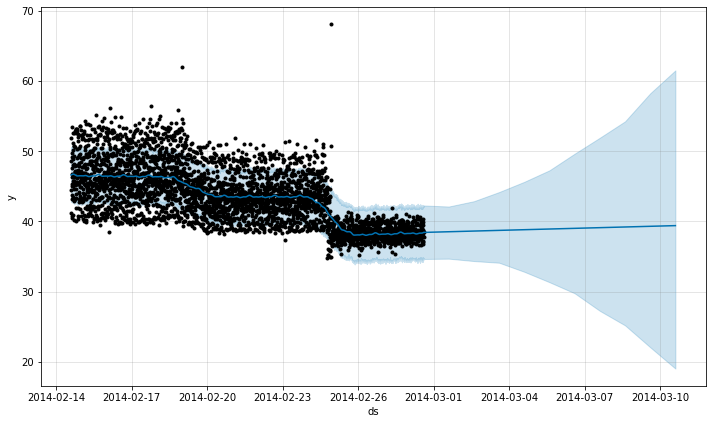

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

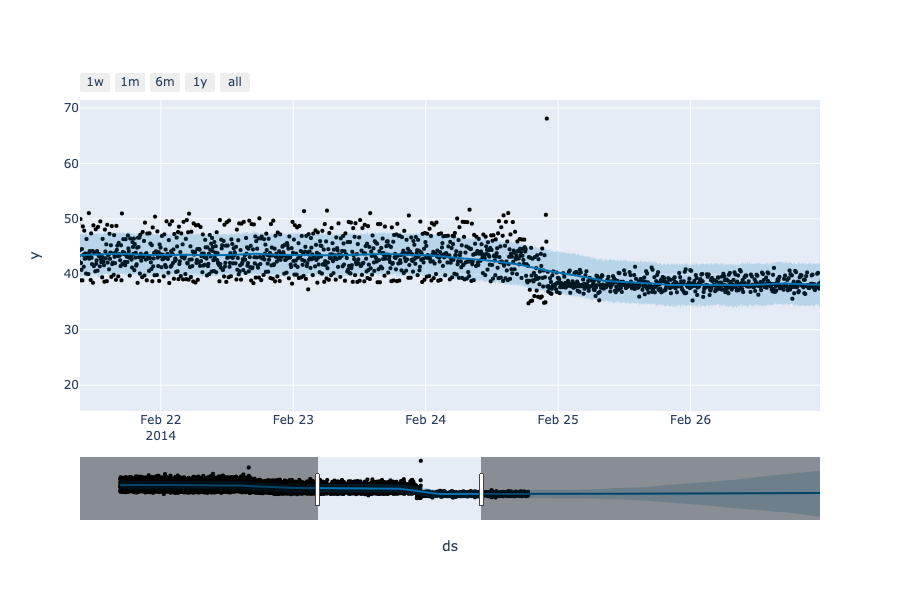

In [ ]:
display(Image("data/plotly-zoomed-in.png"))

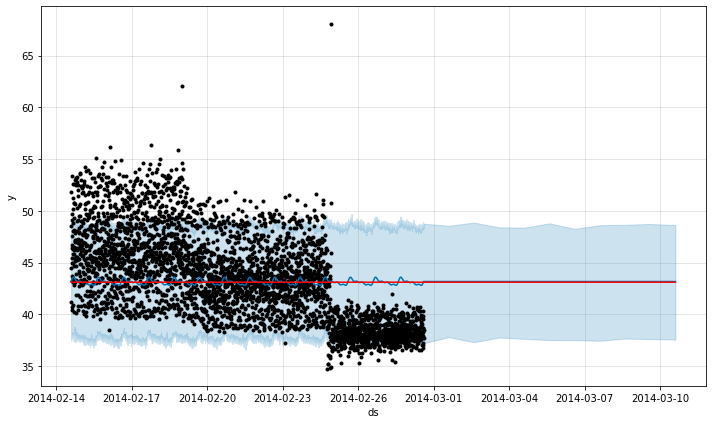

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

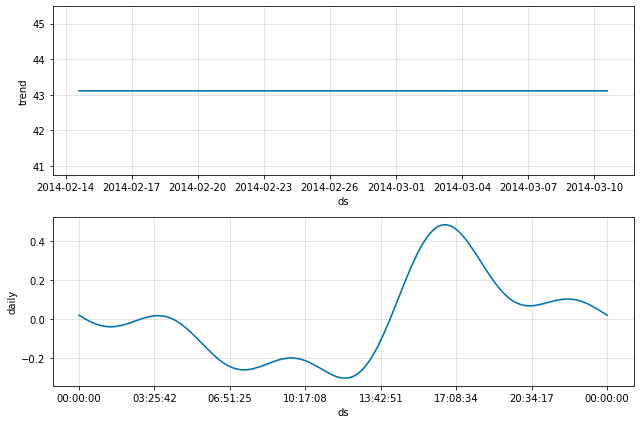

In [ ]:
fig = m.plot_components(forecast)

In [ ]:
m_cv = cross_validation(m, horizon='2 days')

INFO:fbprophet:Making 6 forecasts with cutoffs between 2014-02-21 14:22:00 and 2014-02-26 14:22:00


In [ ]:
m_pm = performance_metrics(m_cv)

In [ ]:
m_pm

horizon        mse      rmse       mae      mape     mdape  \
0   0 days 04:50:00  22.265750  4.718660  4.083095  0.102689  0.092744   
1   0 days 04:55:00  22.440973  4.737190  4.091265  0.103010  0.092607   
2   0 days 05:00:00  22.354685  4.728074  4.083320  0.102833  0.090673   
3   0 days 05:05:00  22.383850  4.731157  4.086636  0.102945  0.091999   
4   0 days 05:10:00  22.459169  4.739111  4.094052  0.103158  0.092607   
..              ...        ...       ...       ...       ...       ...   
514 1 days 23:40:00  28.546420  5.342885  4.950561  0.127348  0.143767   
515 1 days 23:45:00  28.398329  5.329008  4.940563  0.126930  0.143231   
516 1 days 23:50:00  28.382543  5.327527  4.940836  0.126922  0.143231   
517 1 days 23:55:00  28.426433  5.331644  4.949614  0.127127  0.143231   
518 2 days 00:00:00  28.440012  5.332918  4.945560  0.127030  0.143231   

     coverage  
0    0.589855  
1    0.589855  
2    0.591304  
3    0.586957  
4    0.585507  
..        ...  
514  0.389855  
515  0.392754  
516  0.392754  
517  0.388406  
518  0.386957  

[519 rows x 7 columns]

In [ ]:
mape = m_pm.mape.mean()
mape

0.12011586365256524

In [ ]:
import pickle
pkl_path = "C:\\Users\\raksh\\Desktop\\PR\\prophet.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m_cv, f)

# save the dataframe
forecast.to_pickle("C:\\Users\\raksh\\Desktop\\PR\\prophet.pkl")
print("*** Data Saved ***")

*** Data Saved ***


In [ ]:
# read the Prophet model object
with open(pkl_path, 'rb') as f:
    m = pickle.load(f)

fcast = pd.read_pickle("C:\\Users\\raksh\\Desktop\\PR\\prophet.pkl")